1.217342132
1.163923912
1.109966875
1.055879217
1
1.274132266
1.220097587
1.167432398
1.113159162
1.058907415
1.495406074
1.39709145
1.299027403
1.199601514
1.099201741
1.542686152
1.442292088
1.35279433
1.261090227
1.143997051
1.47772858
1.382557646
1.285465095
1.18326763
1.084733246
1.719190752
1.614886876
1.512165088
1.411096889
1.30975255
1.730199202
1.708580278
1.653843512
1.598874399
1.545492726
[[1.21734213 1.16392391 1.10996688 1.05587922 1.        ]
 [1.27413227 1.22009759 1.1674324  1.11315916 1.05890741]
 [1.49540607 1.39709145 1.2990274  1.19960151 1.09920174]
 [1.54268615 1.44229209 1.35279433 1.26109023 1.14399705]
 [1.47772858 1.38255765 1.28546509 1.18326763 1.08473325]
 [1.71919075 1.61488688 1.51216509 1.41109689 1.30975255]
 [1.7301992  1.70858028 1.65384351 1.5988744  1.54549273]]
[1.21734213 1.16392391 1.10996688 1.05587922 1.        ]


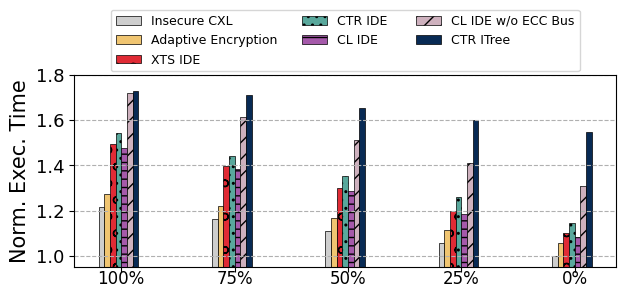

In [66]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl
import itertools
#bar patterns
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

N=5
x=np.arange(N) 
xclicks=[
    '100%','75%', '50%', '25%', '0%',  
]
xlabels='CXL:Local Memory Ratio'
ylabels='Norm. Exec. Time'
wb = openpyxl.load_workbook(filename="ratio.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value)     
        print(value)            
b1=b1.reshape(7, 5)
print(b1)


allfigsize=(7,2.5)     
width=0.05
plt.figure(figsize=allfigsize)

i = (lambda c: lambda: next(c))(itertools.count(0))
j = (lambda c: lambda: next(c))((itertools.count(0)))

print(b1[0])
# plt.bar(x - width*1, b1[0], width, label='w Pre. GCM & Adapt. Encryption', color='#f0c571',hatch="//", edgecolor='black', linewidth=0.5) 
# plt.bar(x , b1[1], width, label='w/o Pre. GCM', color='#a559aa', hatch="x", edgecolor='black', linewidth=0.5)
# plt.bar(x + width*1, b1[2], width, label='w/o Adapt. Encryption',color='#59a89c', hatch="." , edgecolor='black', linewidth=0.5)
off = 7.0 / 2
plt.bar(x + width*(j() - off), b1[i()], width, label='Insecure CXL',color='#cecece', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='Adaptive Encryption',color='#f0c571', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='XTS IDE', color='#e02b35', hatch="o",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR IDE ', color='#59a89c',  hatch="..", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE',  color='#a559aa', hatch="--", edgecolor='black', linewidth=0.5, align='center' )
plt.bar(x + width*(j() - off), b1[i()], width, label='CL IDE w/o ECC Bus', color='#CEB1BE', hatch="//",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*(j() - off), b1[i()], width, label='CTR ITree', color='#082a54', edgecolor='black', linewidth=0.5, align='center')

########################################################

########################################################

# plt.bar(x + width*(j() - off), b1[i()], width, label='Insecure CXL ', color='#cecece',edgecolor='black', linewidth=0.5, align='center')
# plt.bar(x + width*(j() - off), b1[i()], width, label='Integrity Tree ', color='#082a54', edgecolor='black', linewidth=0.5, align='center')





plt.grid(axis='y',linestyle='--')
plt.xticks(x,xclicks, fontsize=12, va='center_baseline') 
#plt.ylim(0,180000)
plt.ylim(0.95, 1.8)
plt.yticks([1.0,1.2,1.4,1.6,1.8],fontsize=13)
# plt.xlabel(xlabels,fontsize=10)
plt.ylabel(ylabels,fontsize=15)    

plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.50, 1.37), fontsize=9)    
plt.savefig('ratio.pdf',bbox_inches = 'tight')    
plt.show()